
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [6]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for creating plot visualization
from matplotlib import pyplot as plt # used for customization when creating the plot visualization
import pylab # used for displaying all figures
import pingouin as pg # used for creating the correlation line
!pip install pingouin

df_mh = pd.read_csv('MillerHadenData.csv')



In [117]:
# Q1a (code):
# Display first few rows of the dataframe
print(df_mh.head())

# Check data types and information
print(df_mh.info())


   Participant  Abil   IQ  Home   TV Rank_Abil   Rank_Home
0            1    61  107   144  487      high    frequent
1            2    56  109   123  608      high  infrequent
2            3    45   81   108  640       low  infrequent
3            4    66  100   155  493      high    frequent
4            5    49   92   103  636       low  infrequent
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Participant  25 non-null     int64 
 1   Abil         25 non-null     int64 
 2   IQ           25 non-null     int64 
 3   Home         25 non-null     int64 
 4   TV           25 non-null     int64 
 5   Rank_Abil    25 non-null     object
 6   Rank_Home    25 non-null     object
dtypes: int64(5), object(2)
memory usage: 1.5+ KB
None


In [137]:
# Q1b (code):
# Check for missing values
print(df_mh.isnull().sum())

# Check whether there is a data point for each participant on both variables
missing_data_participants = df_mh[df_mh['Abil'].isnull() | df_mh['IQ'].isnull()]

# Display the participants with missing data, if any
if not missing_data_participants.empty:
    print("Participants with missing data in Reading Ability or IQ:")
else:
    print("No missing data points for both Reading Ability and IQ.")


Participant    0
Abil           0
IQ             0
Home           0
TV             0
Rank_Abil      0
Rank_Home      0
dtype: int64
No missing data points for both Reading Ability and IQ.


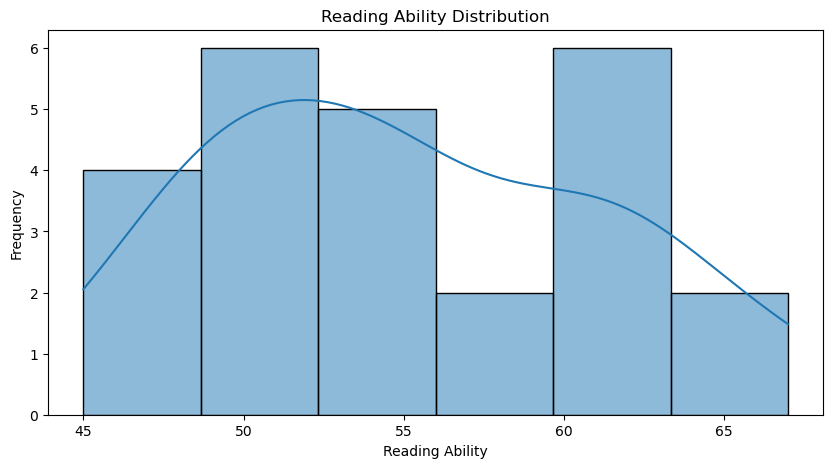

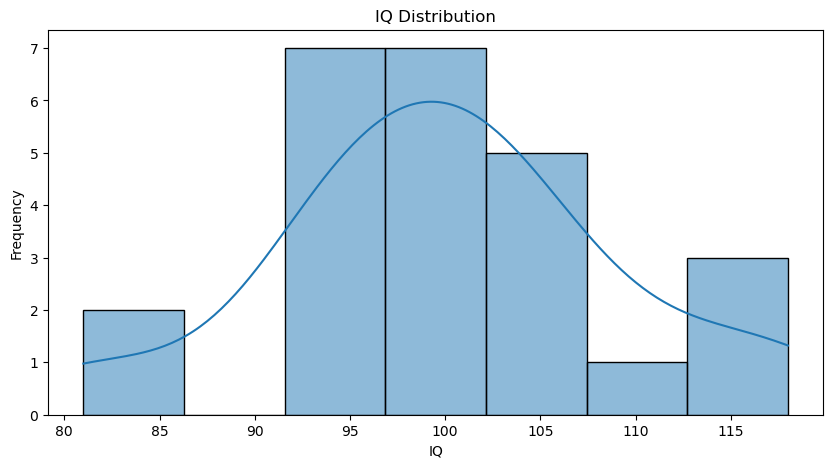

In [138]:
# Q1c (code):
# Check data distribution 

# Plot histogram for Reading Ability
plt.figure(figsize=(10, 5))
sns.histplot(df_mh['Abil'], kde=True)
plt.title('Reading Ability Distribution')
plt.xlabel('Reading Ability')
plt.ylabel('Frequency')
plt.show()

# Plot histogram for IQ
plt.figure(figsize=(10,5))
sns.histplot(df_mh['IQ'], kde=True)
plt.title('IQ Distribution')
plt.xlabel('IQ')
plt.ylabel('Frequency')
plt.show()


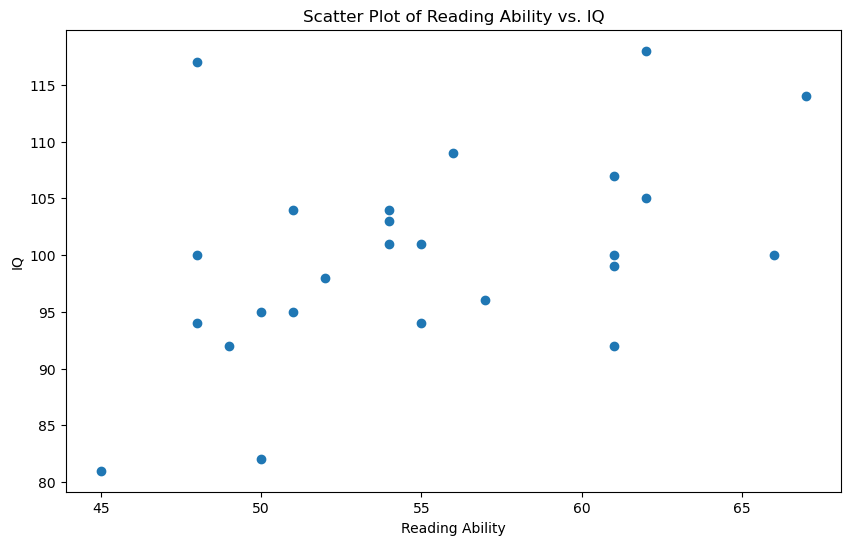

In [36]:
# Q1d (code):
# Scatter plot

# Create scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df_mh['Abil'], df_mh['IQ'])

# Add titles and labels
plt.title('Scatter Plot of Reading Ability vs. IQ')
plt.xlabel('Reading Ability')
plt.ylabel('IQ')

# Display the plot
plt.show()


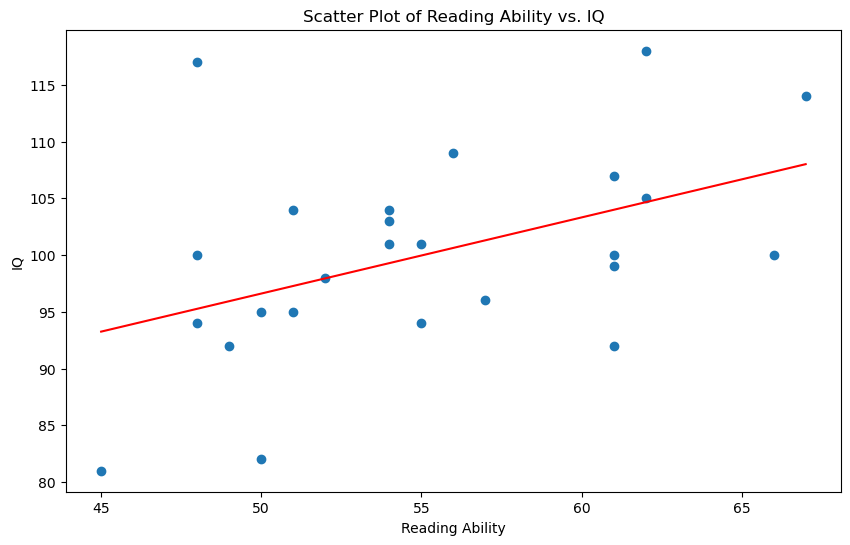

In [45]:
# Q1e (code):
# Correlation line

# Create scatter plot using matplotlib
plt.figure(figsize=(10, 6))
plt.scatter(df_mh['Abil'], df_mh['IQ'])

# Add titles and labels
plt.title('Scatter Plot of Reading Ability vs. IQ')
plt.xlabel('Reading Ability')
plt.ylabel('IQ')

# Create correlation line
plt.plot(x_vals, y_vals, color = 'red')

# Display the plot
plt.show()



**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

## Q2a (answer with words):
Based on the results of question 1, particulary the scatter plot, we can see that the two variables have somehwat positive linear relationship. Therefore, we can use Pearson to conduct a correlation coefficient test.

In [139]:
# Q2b (code):
# Conduct Pearson correlation coefficient test
pearson_corr, p_value = stats.pearsonr(df_mh['Abil'], df_mh['IQ'])

print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"P-value: {p_value}")

Pearson Correlation Coefficient: 0.45116993876507616
P-value: 0.02359260883361457


## Q2c (answer with words):

With the correlation coefficient of 0.45116993876507616, it suggests that there is a moderate positive relationship between the reading ability and IQ. It means as one variable increases, it tends to be associated with the other, however the relationship is not strong enough to imply that one variable could predict the other accurately.

## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

## Q3a (answer in words):
H0: There is no significant association between reading ability and the frequency of reading at home.

H1: There is a significant association between reading ability and the frequency of reading at home.

In [140]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  ##used for data manipulation analysis
from scipy.stats import chi2_contingency ##used for performing the chi-square test

# Define the rounded average for Reading Ability and Home
avg_abil = df_mh['Abil'].mean()
avg_home = df_mh['Home'].mean()

# Create the Rank_Abil column
df_mh['Rank_Abil'] = df_mh['Abil'].apply(lambda x: 'high' if x > avg_abil else 'low')

# Create the Rank_Home column
df_mh['Rank_Home'] = df_mh['Home'].apply(lambda x: 'frequent' if x > avg_home else 'infrequent')


In [141]:
# Q3c (code):
# Construct Contingency Matrix
contingency_matrix = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])

# Print the contingency matrix
print(contingency_matrix)

Rank_Home  frequent  infrequent
Rank_Abil                      
high              8           2
low               3          12


In [142]:
# Q3d (code):
# Perform the Chi-square test
chi2, p_value, dof, expected_freq = chi2_contingency(contingency_matrix)

print(f"Chi-square Statistic: {chi2}, P-value: {p_value}, Degrees of freedom: {dof}, Expected frequencies: {expected_freq}")




Chi-square Statistic: 6.500270562770561, P-value: 0.010785807794066234, Degrees of freedom: 1, Expected frequencies: [[4.4 5.6]
 [6.6 8.4]]


## Q3e (answer in words):
The P-value as indicated in the result above is 0.010785807794, which is less than 0.05.
P-value lower than 0.05 rejects the null hypothesis that said there is no association.
Hence, this P-value indicates that there is a significant association between reading ability and the frequency of reading. 

## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [143]:

import pandas as pd # used for data wrangling and manipulation
from scipy import stats # used for statistical analysis
import numpy as np # used for numerical computations
import matplotlib.pyplot as plt # used for plot visualization
import seaborn as sns # used for complex visualization

# Load the data
df_evaluators = pd.read_csv('evaluators.csv')
df_evaluators.head()


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [144]:
# Q4a (code):
# Calculate mean and standard deviation for age
mean_age = df_evaluators['age'].mean()
std_age = df_evaluators['age'].std()

print(f"Mean Age: {mean_age}")
print(f"Standard Deviation of Age: {std_age}")

Mean Age: 30.852941176470587
Standard Deviation of Age: 6.238358141327351


In [145]:
# Q4b (code)
# Count male and female evaluators
# In the 'sex' column: 1 represents males and 2 represents females

sex_counts = df_evaluators['sex'].value_counts()
# Counting males evaluators, default to 0 if not present
num_males = sex_counts.get(1, 0)

# Counting females evaluators, default to 0 if not present
num_females = sex_counts.get(2, 0) 

print(f"Number of Male Evaluators: {num_males}")
print(f"Number of Female Evaluators: {num_females}")


Number of Male Evaluators: 4
Number of Female Evaluators: 30


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [146]:
# Load ratings data
df_ratings = pd.read_csv('ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [147]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
intellect_ratings = df_ratings[df_ratings['Category'].isin(['thoughtful','competent','intelligent'])]

# Calculate the mean intellect rating for each evaluator
# Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = intellect_ratings.groupby('eval_id')['Rating'].mean().reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect'

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'
# Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings], ignore_index=True)

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = ratings2.merge(df_evaluators[['eval_id', 'condition']], on='eval_id', how='left')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category'])

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()

,eval_id,Category,Rating,condition
40,1,hire,6.000000,listened
39,1,impression,7.000000,listened
0,1,intellect,6.000000,listened
42,2,hire,4.000000,listened
41,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



## Q6a (answer in words):
Null hypothesis: There is no significant difference between overall ratings on the Intellect, Hire, and Impression scale between evaluators who listened to resume picthes and read the resume pitches.

Alternative hypothesis: There is significant difference between overall ratings on the Intellect, Hire, and Impression scale between evaluators who listened to resume pitches and read the resume pitches.

we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

## Q6b (answer in words):
Which t-test should we choose, one-tail or two-tail? Explian why.

The t-test we choose should be two-tail, because the alternative is non-directional, meaning there will be a significant differences in overall ratings on the scales of Intellect, Hire, and Impression between evaluators who listened to resume pitches and those who read the resume picthes.

## Q6c (answer in words):
What are the independent variable and the dependent variable here?

The independent variable is the method of whether the evaluators listened to the pitches or read the pitches.

The dependent variable is the overall ratings given by the evaluators on the scale of Intellect, Hire, and Impression.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [148]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for getting the analysis

# Descriptive analysis of the ratings
ratings_desc = ratings2.groupby(['Category', 'condition'])['Rating'].describe()


# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = {}
shapiro_results = ratings2.groupby(['Category', 'condition'])['Rating'].apply(shapiro).reset_index()
shapiro_results.columns = ['Category', 'Condition', 'Shapiro_Results']

# Test for homogeneity of variances (Levene's test)
levene_results = {
    category: levene(
        ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'listened')]['Rating'],
        ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'read')]['Rating'])
    for category in ['intellect', 'impression', 'hire']}


# Independent t-tests
ttest_results = {
    category: ttest_ind(
        ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'listened')]['Rating'],
        ratings2[(ratings2['Category'] == category) & (ratings2['condition'] == 'read')]['Rating'])
    for category in ['intellect', 'impression', 'hire']}
    

ratings_desc,shapiro_results, levene_results, ttest_results 

(                      count      mean       std       min       25%       50%  \
 Category   condition                                                            
 hire       listened    21.0  4.714286  2.261479  0.000000  4.000000  5.000000   
            read        18.0  2.888889  2.054805  0.000000  1.250000  2.000000   
 impression listened    21.0  5.968254  1.917477  2.333333  4.666667  6.666667   
            read        18.0  4.074074  2.233306  0.333333  2.166667  4.500000   
 intellect  listened    21.0  5.634921  1.608674  2.333333  5.000000  5.666667   
            read        18.0  3.648148  1.911343  0.666667  2.083333  3.666667   
 
                            75%       max  
 Category   condition                      
 hire       listened   7.000000  8.000000  
            read       4.000000  7.000000  
 impression listened   7.333333  8.666667  
            read       5.333333  7.333333  
 intellect  listened   6.000000  9.000000  
            read       4.666667  7

## Q7b (answer in words):

#### Descriptive Stastitics Interpretatoin
In all three categories of Hire, Impression, and Intellect, evaluators who listened to the pitches have a mean of giving higher ratings than the evaluators who read the pitches. This test is used to show a preliminary result of the mean of each group.

#### Shapiro-Wilk Test for Normal 
All p value of the Shapiro results show greater than 0.05, which means there is no deviation from the normality for ratings in all categories. This test is to validate the normality assumption for t-test. 

#### Levene's Test
In Hire, Impression, and Intellect results, the p values are greater than 0.05. We can assume that these results show all three categories are homogeneous. The reason we use Levene's test is indeed to test the homogeneity of the variables. 

#### Independent t-tests
The results of the independent t-tests on the categories of Hire, Impression, and Intellect reveal significant differences in mean ratings between the group of evaluators who listened and evaluators who read the pitches. The findings show the the evaluators who listen have higher mean rating the ones reading the pitches. 

